In [42]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt

In [43]:
# make a dataset with x and y cordinates
x,y =  make_blobs(n_samples=1000,centers=3,n_features=2,random_state=23)

In [44]:
x.shape

(1000, 2)

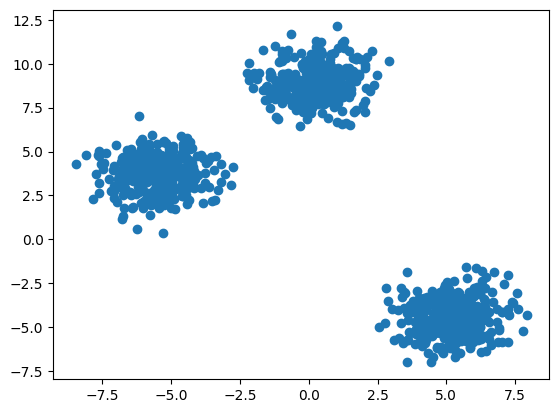

In [45]:
plt.scatter(x[:,0],x[:,1])

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
X_train, X_test,Y_train, Y_Test = train_test_split(x,y,test_size=0.33,random_state=42)

In [48]:
from sklearn.cluster import KMeans

In [49]:
# lets do it in manual way 
# elbow method to select the k values 
wcss = [] 
for k in range(1,11):
    kmeans = KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)
    

In [50]:
wcss

[34827.57682552022,
 7935.437286145416,
 1319.2730531585607,
 1140.4677884655127,
 1004.9047225889931,
 918.2175976758745,
 756.3779768316753,
 673.957746255569,
 580.2177804289877,
 531.3846583938488]

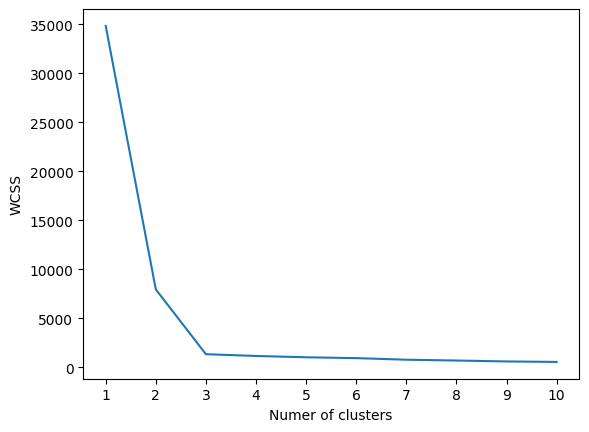

In [51]:
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel("Numer of clusters")
plt.ylabel('WCSS')
plt.show()

In [52]:
kmeans = KMeans(n_clusters=3,init='k-means++')

In [63]:
y_lables = kmeans.fit_predict(X_train)

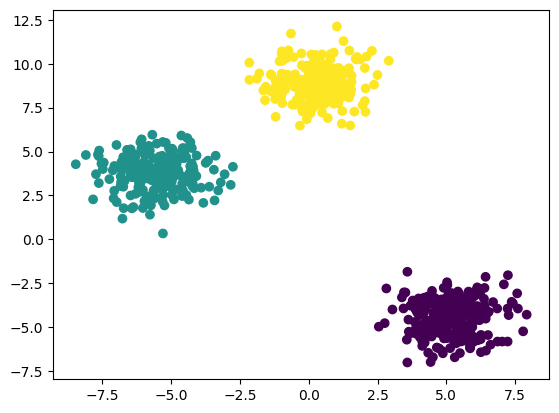

In [64]:
plt.scatter(X_train[:,0],X_train[:,1],c=y_lables)

In [54]:
# now do it in automated way
!pip install kneed


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [65]:
from kneed import KneeLocator
kl = KneeLocator(range(1,11),wcss,curve='convex',direction='decreasing')
kl.elbow

3

In [66]:
# performance metrics 
from sklearn.metrics import silhouette_score


In [68]:
silhouette_coefficients = []
for k in range(2,11):
    kmeans = KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(X_train)
    score = silhouette_score(X_train,kmeans.labels_)
    silhouette_coefficients.append(score)

In [69]:
silhouette_coefficients

[0.7281443868598331,
 0.8071181203797673,
 0.6403729777570589,
 0.49134355005793395,
 0.5070606783833341,
 0.3401074877552325,
 0.35017496695516814,
 0.32870392374289603,
 0.32302599919972397]

In [70]:
kmeans.predict(X_test)

array([6, 6, 6, 1, 0, 6, 5, 8, 7, 5, 6, 6, 0, 9, 2, 4, 8, 6, 7, 2, 6, 6,
       8, 2, 6, 8, 3, 6, 3, 9, 5, 3, 9, 3, 1, 0, 0, 9, 3, 0, 6, 7, 0, 2,
       8, 3, 8, 6, 2, 5, 0, 6, 1, 6, 3, 6, 6, 2, 3, 7, 0, 6, 2, 6, 2, 1,
       8, 2, 3, 0, 6, 2, 0, 8, 4, 6, 5, 1, 6, 6, 3, 0, 1, 0, 1, 1, 0, 2,
       1, 6, 3, 6, 7, 6, 7, 1, 6, 9, 0, 8, 8, 7, 6, 4, 3, 8, 3, 7, 1, 9,
       7, 7, 4, 0, 9, 7, 7, 2, 0, 7, 3, 7, 4, 0, 8, 5, 7, 2, 0, 9, 3, 6,
       2, 0, 8, 0, 6, 5, 6, 2, 0, 0, 0, 2, 7, 0, 1, 1, 1, 8, 6, 0, 3, 2,
       2, 7, 6, 2, 4, 9, 2, 2, 1, 1, 0, 6, 5, 9, 2, 6, 2, 7, 2, 6, 3, 0,
       7, 8, 8, 6, 1, 0, 4, 2, 0, 7, 9, 3, 4, 6, 0, 4, 3, 3, 3, 5, 0, 0,
       8, 5, 2, 2, 5, 6, 8, 0, 4, 4, 7, 2, 7, 2, 2, 6, 2, 6, 3, 6, 6, 0,
       1, 6, 0, 1, 7, 2, 2, 7, 6, 2, 2, 6, 3, 1, 3, 0, 1, 6, 8, 6, 3, 2,
       2, 3, 6, 4, 2, 6, 7, 6, 1, 4, 1, 6, 1, 0, 6, 6, 4, 2, 8, 8, 1, 2,
       8, 7, 6, 5, 9, 3, 4, 0, 7, 0, 4, 6, 0, 6, 7, 5, 5, 8, 6, 6, 5, 8,
       6, 8, 7, 3, 7, 3, 6, 0, 3, 0, 7, 3, 4, 8, 6,

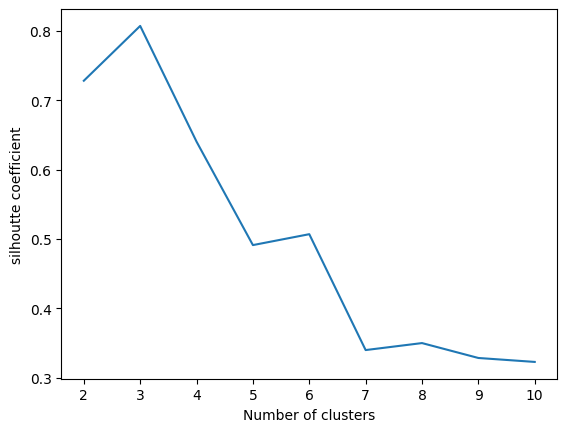

In [72]:
# plotting silhoutte score 
plt.plot(range(2,11),silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel('Number of clusters')
plt.ylabel("silhoutte coefficient")
plt.show()